<div style="background-color: #28a745 !important; color: white; min-height: 50px; padding: 10px; margin: auto;">
    <p style="text-align: right; font-style: italic">Geoscope Geohazard Workshop HMGF UGM</p>
    <h1>Menggunakan ObspyDMT</h1>
</div>
<div style="background-color: whitesmoke; padding: 10px ">
    <ul>
        <li>Tujuan: Mengaplikasikan ObspyDMT untuk manajemen data seismologi</li>
        <li>Keluaran: Peserta dapat mengunduh, mengolah, dan mengelola data seismologi</li>
        <li>Sesi: 3</li>
        <li>Waktu/Tempat: Sabtu, 27 Februari 2021/ Zoom Meeting</li>
    </ul>
</div>

## 1. Perkembangan Data Seismologi

Sesi kedua kemarin kita mengolah data katalog gempa kemudian membuat visualisasi sederhana dari katalog tersebut. Katalog gempa bumi merupakan salah satu data seismologi. Data seismologi lain dapat berupa seismogram rekaman gempa dan informasi mengenai instrumen perekam gempa pada masing-masing stasiun perekam tersebut. Seiring majunya instrumentasi dan mendukungnya sarana telekomunikasi melalui internet, badan-badan misi perekaman data seismologi memberikan sarana untuk mengunduh masing-masing jenis data tersebut melalui berbagai macam metode yang didasari pada komunikasi internet.

![seismological data growth](figures/seismological_data_growth.png)

Gambar di atas adalah perkembangan jumlah data rekaman gempa komponen vertikal dan magnitudo gempa di atas 5 (Hosseini dan Sigloch, 2017). Garis biru putus-putus merupakan jumlah kejadian gempa bumi, garis biru merupakan jumlah rekaman gempanya, dan garis merah merupakan nilai kumulatif jumlah kejadian yang dikalikan dengan jumlah channel. Dari gambar di atas kita dapat melihat bahwa perkembangan jumlah rekaman (garis biru) sangat cepat dibanding jumlah kejadian gempa.

Masing-masing badan-badan misi memiliki pusat data untuk mengunduh data dengan dua macam antarmuka komunikasi yaitu FSDN dan Arclink, pusat-pusat data tersebut adalah:

sumber data| URL|
--------| -------- |
BGR |  http://eida.bgr.de
EMSC |  http://www.seismicportal.eu
ETH | http://eida.ethz.ch
GEONET | http://service.geonet.org.nz
GFZ | http://geofon.gfz-potsdam.de
INGV | http://webservices.rm.ingv.it
IPGP | http://eida.ipgp.fr
IRIS | http://service.iris.edu
ISC | http://isc-mirror.iris.washington.edu
KOERI | http://eida.koeri.boun.edu.tr
LMU | http://erde.geophysik.uni-muenchen.de
NCEDC | http://service.ncedc.org
NIEP | http://eida-sc3.infp.ro
NOA | http://eida.gein.noa.gr
ODC | http://www.orfeus-eu.org
ORFEUS | http://www.orfeus-eu.org
RESIF | http://ws.resif.fr
SCEDC | http://service.scedc.caltech.edu
USGS | http://earthquake.usgs.gov
USP | http://sismo.iag.usp.br
*Hosseini dan Sigloch (2017)*

Melimpahnya sumber data ini membuat analisis seismologi menjadi lebih kaya dan komprehensif. Namun, hal tersebut juga memberikan masalah baru yaitu bagaimana mengunduh, mengelola, dan mengecek data apabila kita hendak menggunakan sumber data yang berbagai macam karena tentunya setiap sumber data memiliki format data yang berbeda. Masalah tersebut yang kemudian mendasari pembuatan perangkat lunak Obspy Data Management Tool (ObspyDMT). ObspyDMT dapat mengunduh, memproses, dan mengelola data seismologi mulai dari katalog, data rekaman, dan metadata rekaman serta stasiun dengan otomatis dan efektif.

## 2. Obspy Data Management Tool (ObspyDMT)

ObspyDMT dikembangkan oleh Hosseini dan Sigloch (2017) menggunakan bahasa pemrograman Python dan dapat dijalankan pada sistem operasi Linux, MacOS, dan Windows. Program ini merupakan bagian dari Obspy (modul Python untuk seismologi) yang memiliki fungsi spesifik untuk mendownload, mengolah, dan mengelola data seismologi, beberapa fungsi untuk mengolah dan mengunduh data merupakan fungsi yang diimpor Obspy. ObspyDMT juga memanfaatkan `scipy`, `numpy`, `matplotlib`, dan `Basemap` untuk fungsionalitas yang lain sehingga juga merupakan dependensi dari paket ini. Daftar proses yang dapat dilakukan dari ObspyDMT adalah.

1. Mengunduh meta data stasiun: berdasarkan waktu absolut atau relatif terhadap kejadian gempa, terhadap lokasi (dapat berupa kotak atau lingkaran), berdasarkan channel, dan parameter lain. Kita dapat memanfaatkan *wildcards* `*` untuk mempermudah penyaringan data.
2. Mengunduh meta data sumber gempa bumi: dari berbagai macam penyedia data (sumber data), yang didukung adalah: NEIC, Global CMT, IRIS DMC, NCEDC, USGS, INGV and ISC. Meta data yang dapat diunduh mulai dari informasi umum sumber gempa sampai informasi tensor momen.
3. Menampilkan plot metadata dengan perintah yang mudah yang berfungsi sebagai alat pengecekan/diagnostik
4. Mengunduh data rekaman gempa bumi (seismogram) berdasarkan kejadian gempa dan stasiun yang sebelumnya sudah diunduh pada proses (2) baik dengan protokol ArcLink atau FSDN.
5. Memanfaatkan paralelisasi dalam pengunduhan data sehingga dapat lebih cepat
6. Memperbarui (*update*) data yang sebelumnya kita unduh, data akan dikelola secara otomatis oleh ObspyDMT
7. Mengelola data secara otomatis dalam folder-folder yang sudah rapi
8. Memproses data berdasarkan fungsi yang dapat ditentukan sendiri oleh pengguna
9. Melakukan koreksi instrumen secara otomatis
10. Mengunduh seismogram sintetik sampai dengan 30 data untuk dibandingkan dengan data yang asli.

![obspydmt folder structure](figures/obspydmt_folder.png)

Gambar di atas adalah struktur folder data yang kita unduh. `datapath` merupakan nama folder tempat kita menyimpan semua data kita, baik itu meta data ataupun data rekaman, setiap kita menjalankan proses obspyDMT kita harus mendefinisikan `datapath` ini, folder kemudian akan dibuat oleh ObspyDMT yang akan berisi berbagai macam data yang telah kita unduh. Misalkan kita ingin mengolah data untuk Indonesia, kita bisa memberikan nama folder adalah `indonesia_events`. Di dalam folder `indonesia_events` ini nantinya akan ada satu folder bernama `EVENTS-INFO` dan folder lain yang biasanya bernama `[tanggal]_[identita-sevent].a`. Data katalog akan tersimpan di folder `EVENTS-INFO` berbentuk data tabular bernama `catalog.txt` atau format lain seperti QuakeML (`catalog.ml`) dan format *pickle*. 

Data rekaman akan masuk ke masing-masing folder yang berformat `[tanggal]_[identitas-event].a`, contoh: `20210210_131955.a` untuk gempa yang terjadi pada 10 Februari 2021 dengan identitas 131955. Di dalam folder ini akan terdapat empat folder utama `info`, `resp`, `raw`, `processed`. `info` akan menyimpan informasi lokasi gempa dan stasiun, ketersediaan data, informasi input kita, serta informasi log dari setiap proses, `resp` akan menyimpan informasi respon istrumen (meta data instrumen/stasiun), `raw` akan menyimpan data rekaman yang asli, dan `processed` akan menyimpan data rekaman yang sudah diproses, salah satu prosesnya adalah koreksi instrumen.

## 3. Menginstal ObspyDMT
Paket ObspyDMT ini merupakan salah satu paket Python yang dapat sudah dilengkapi *command line interface* (CLI) sehingga sebenarnya pengguna tidak harus memiliki pengetahuan Python terlebih dahulu. Bagi yang lebih nyaman menjalankan kode di dalam lingkungan Python maka pengguna juga dapat menjalankannya sebagai paket yang bisa diimpor. Metode menjalankan program yang dibahas lengkap pada sesi ini adalah CLI.

Instalasi ObspyDMT dapat dilakukan di *virtual environment* kemarin atau pada *virtual environment* yang baru, karena paket ini tidak tersedia di repositori Anaconda Cloud maka kita harus menginstall melalui `pip`. Hal ini yang menyebabkan tidak semua dependensi ikut terinstall sehingga kita harus melakukannya secara manual, di awali dengan menginstal `numpy`, `scipy`, dan `basemap`.

```
conda install numpy scipy basemap
```

Langkah dilanjutkan dengan menginstall `obspy` melalui kanal `conda-forge`:

```
conda install -c conda-forge obspy
```

Setalah semua dependensi terinstal kita selanjutnya dapat menginstall ObspyDMT dengan perintah:

```
pip install obspydmt
```

Instalasi akan berjalan cepat karena ukuran ObspyDMT kecil. Setelah proses instalasi selesai kita dapat mencoba mengetes dengan menuliskan perintah pada Anaconda Prompt kita:

```
obspyDMT --check
```

Sering terjadi *error* `cannot import 'dedent' from 'matplotlib.cbook'` pada Windows yang disebabkan karena versi `matplotlib` yang terlalu tinggi, `dedent` hanya ada pada `matplotlib` versi 3.2 ke bawah sehingga kita harus *mendowngrade* `matplotlib`.  Proses *downgrade* bisa dilakukan baik di `conda` maupun `pip`, pada contoh ini kita akan menggunakan `pip`:

```
pip install -U matplotlib==3.2
```

Jalankan ObspyDMT lagi, jika berhasil maka akan muncul:

```
--------------------------------------------------------------------------------
		   obspyDMT (obspy Data Management Tool)

	Python Toolbox for Retrieving, Processing and Management of
			Large Seismological Datasets

:copyright:
The ObsPy Development Team (devs@obspy.org)

Developed by Kasra Hosseini
email: kasra.hosseinizad@earth.ox.ac.uk

:license:
GNU General Public License, Version 3
(http://www.gnu.org/licenses/gpl-3.0-standalone.html)
--------------------------------------------------------------------------------
```

di bagian bawah akan tercetak versi-versi paket yang menjadi dependensi dari ObspyDMT:

```
********************************
Check all the BASIC dependencies
********************************

=================================
obspy ver: 1.2.2
numpy ver: 1.20.1
scipy ver: 1.6.0
matplotlib ver: 3.2.0
Basemap ver: 1.2.2+dev
=================================
```

ObspyDMT bergantung pada lima modul lain yaitu `obspy`, `numpy`, `scipy`, `matplotlib`, dan `Basemap`, sehingga lima paket tersebut dapat kita sebut sebagai dependensi dari ObspyDMT.


## 4. Mode Kelola Meta Data Katalog (Metadata Sumber Gempa)

### 4.1 Mengunduh Katalog

Katalog dapat kita unduh secara otomatis dengan menggunakan parameter/*flag* `event_info` yang didahulu lokasi folder untuk menyimpan data `datapath` dan parameter lain untuk memfilter katalog yaitu:

| *flag*/parameter      | deskripsi | contoh |
| ----------- | ----------- | ----------- |
| `min_date` | waktu awal dalam `YYYY-MM-DD` | 2020-01-01 |
| `max_date` | waktu akhir dalam `YYYY-MM-DD` | 2020-01-31 |
| `min_depth` | kedalaman maksimum dalam km | 30.0 |
| `max_depth` | kedalaman minimum dalam km | 600.0 |
| `min_mag` | magnitudo minimum | 3.0 |
| `max_mag` | magnitudo maksimum | 7.0 |
| `mag_type` | jenis magnitudo | Mw |
| `event_rect` | batas kotak area gempa `<lonmin/lonmax/latmin/latmax>` dalam derajat| 95/141/-6/11 |
| `event_circle` | batas lingkaran area gempa ` <lon>/<lat>/<rmin>/<rmax>` dalam derajat| 120/0/1/5 |

Contoh apabila kita ingin menyimpan file katalog yang kita unduh ke folder `katalog_dunia_neic` untuk magnitudo minimum 4,5 yang terjadi pada 2020-01-01 sampai 2020-04-30 dengan sumber katalog NEIC_USGS maka kita dapat menggunakan perintah:

```
obspyDMT --datapath katalog_dunia_neic --min_mag 4.5 --min_date 2020-01-01 --max_date 2020-04-30 --event_catalog NEIC_USGS --event_info
```

Setelah menjalankan perintah di atas di Anaconda Prompt maka akan muncul status pengunduhan data:

```
obspyDMT primary mode: event_based


Event(s) are based on:	NEIC_USGS
#Divisions: 4
1,2,3,
```

Ringkasan data yang terunduh akan ditampilkan setelah proses selesai:

```
#N   LAT       LON       DEP  DATETIME             MAG   AUTH  EV_ID              FLY  
--------------------------------------------------------------------------------
1     -23.280   -66.610  195  2020-04-29T16:04:31  4.9   None  20200429_160431.a  NAN
2      20.191   -74.158  10   2020-04-29T10:22:47  4.6   None  20200429_102247.a  NAN
3     -24.270   -67.046  149  2020-04-29T05:37:16  5.4   None  20200429_053716.a  NAN
..
440    51.202  -178.130  38   2020-01-01T15:05:57  4.8   None  20200101_150557.a  NAN
441   -17.428  -172.504  10   2020-01-01T08:31:24  5.4   None  20200101_083124.a  NAN
442    51.660  -176.691  54   2020-01-01T03:20:28  4.6   None  20200101_032028.a  NAN
--------------------------------------------------------------------------------

Number of events/intervals: 442
Time for retrieving and saving the event info: 0:00:41
```

### 4.2 Mengeplot kejadian gempa
Data yang kita unduh akan masuk di folder `katalog_dunia_neic/EVENTS-INFO`, ada berbagai macam format data yang terunduh. Data yang sudah familiar dengan kita adalah data tabular yang tersimpan dalam file `catalog.txt`. Kita dapat mengeplot data katalog kita dengan menggunakan tambahan parameter `--local` yang menunjukkan proses lokal (tanpa mendownload data) dan parameter `--plot_ev` yang merupakan perintah untuk mengeplot *event* atau kejadian:

```
obspydmt --datapath katalog_dunia_neic --local --plot_ev
```

Peta seperti ini akan muncul dalam jendela baru:

![world catalog](./figures/world_catalog_ev.png)

Dengan tambahan opsi (atau sering disebut sebagai `flag`) seperti tabel pada bagian 4.1 di atas kita dapat membuat lokasi spesifik yaitu di Indonesia dengan memasukkan nilai batas Indonesia dalam opsi `--event_rect` seperti pada contoh perintah di bawah ini (hasil download akan kita masukkan ke folder `katalog_indonesia_neic`):

```
obspyDMT --datapath katalog_indonesia_neic --event_rect 95/141/-6/11 --min_mag 4.5 --min_date 2020-01-01 --max_date 2020-04-30 --event_catalog NEIC_USGS --event_info
```
![indonesia catalog](./figures/indonesia_catalog_ev.png)


### 4.3 Mengeplot Seismisitas

Informasi lebih mendetail mengenai seismisitas yang meliputi statistik kedalaman, statistik magnitudo, plot kejadian berdasarkan magnitudo dan kedalaman, serta plot dari mekanisme fokal dari katalog dapat kita buat memanfaatkan *flag* `plot_seismicity`. Perintah lengkapnya adalah seperti ini:

```
obspydmt --datapath katalog_dunia_neic --local --plot_seismicity
```

Akan ada empat gambar yang muncul setelah proses ini dijalankan:
1. Plot Seismisitas Berdasarkan Magnitudo dan Kedalaman
![world catalog](./figures/world_catalog_seism_pl.png)
2. Plot Seismisitas dengan Mekanisme Fokal
![world catalog](./figures/world_catalog_seism.png)

Pada plot di atas secara sekilas gempa-gempa hanya berupa titik dalam peta, apabila kita perbesar (*zoom*) maka kita dapat melihat mekanisme fokal dari masing-masing gempa:
![world catalog](./figures/world_catalog_seism_z.png)

3 dan 4: Histogram 
![world catalog](./figures/world_catalog_seism_hist.png)


## 5. Mode Kelola Data Rekaman Gempa (*Event Based*)
### 5.1 Mengunduh Data Rekaman Gempa

Jika pada langkah sebelumnya kita hanya mengunduh meta data dari kejadian gempabumi dengan format data katalog kejadian, pada mode *event based*  kita akan mengunduh data rekaman tiap gempabumi yang memenuhi syarat yang kita berikan. Beberapa tambahan *flag* perlu kita tambahkan yang menjelaskan sumber download data dan informasi stasiun apa saja yang ingin kita download datanya, secara lebih lengkap kita dapat rinci parameter-parameter tersebut dalam tabel seperti di bawah ini:

| *flag*/parameter      | deskripsi | contoh |
| ----------- | ----------- | ----------- |
| `data_source`      | Sumber download data rekaman gempa       | IRIS |
| `net`   | Kode jaringan stasiun yang digunakan        |II|
| `sta`   | Kode nama stasiun | KAPI |
| `loc`   | Kode lokasi stasiun | 00 |
| `cha`   | Channel yang akan diunduh | BHZ |
| `identity` | Identitas spesifik dengan format `NET.STA.LOC.CHA` | II.KAPI.00.BHZ
| `station_rect` | Kotak batas lokasi stasiun yang akan diunduh datanya, format: `<lonmin/lonmax/latmin/latmax>`  dalam derajat| 95/141/-6/11 |
| `station_circle` | Lingkaran batas lokasi stasiun yang akan diunduh datanya, format: ` <lon>/<lat>/<rmin>/<rmax>` dalam derajat| 120/0/1/5 |

Sebagai contoh pertama untuk *event mode*, kita akan mendownload data gempa untuk jangka waktu tahun 2021 yaitu (1 Januari-25 Februari) dengan magnitudo minimal adalah 7.0. Sumber data yang dipilih adalah `IRIS` dengan kode jaringan (`--net`) adalah `II` dan kode lokasi (`--loc`) adalah `00`, komponen yang akan diunduh adalah komponen `BHZ`. Panjang rekaman yang akan kita unduh adalah 1800 detik (`--offset`). Lama proses pengunduhan tergantung dari jumlah gempa dan stasiun yang masuk dalam syarat yang telah kita lakukan. Perintah yang diketikkan adalah:

```
obspyDMT --datapath event_2021 --min_date 2021-01-01 --max_date 2021-02-25 --min_mag 7.0 --event_catalog NEIC_USGS --data_source IRIS --net "II" --loc "00" --cha "BHZ" --preset 100 --offset 1800
```

Keterangan yang akan tercetak pada Anaconda Prompt adalah daftar event atau kejadian gempa yang memenuhi syarat yang kita berikan:

```
obspyDMT primary mode: event_based


Event(s) are based on:	NEIC_USGS
#Divisions: 1
1,
Assembling 2 xml files...
1,2,
cleaning up the temporary folder.

3.575270993 sec to retrieve the event info form NEIC.

#N LAT       LON       DEP DATETIME             MAG  AUTH  EV_ID              FLY  
--------------------------------------------------------------------------------
1    37.745   141.749  50  2021-02-13T14:07:50  7.1  None  20210213_140750.a  NAN
2   -23.054   171.601  10  2021-02-10T13:19:55  7.7  None  20210210_131955.a  NAN
3     5.005   127.519  80  2021-01-21T12:23:04  7.0  None  20210121_122304.a  NAN
--------------------------------------------------------------------------------

Number of events/intervals: 3
```

Setelah itu di bawah dari keterangan event akan ada keterangan capaian dari pengunduhan data dan pengunduhan file response.

```
IRIS -- event: /Users/anangsahroni/Job/geohazardpy/obspyDMT/event_2021/20210213_140750.a
[1/3-1/43] -- IRIS -- saving waveform for: II.AAK.00.BHZ  ---> DONE
[1/3-1/43] -- IRIS -- saving response for: II.AAK.00.BHZ  ---> DONE
[1/3-2/43] -- IRIS -- saving waveform for: II.ABPO.00.BHZ  ---> DONE
[1/3-2/43] -- IRIS -- saving response for: II.ABPO.00.BHZ  ---> DONE
[1/3-3/43] -- IRIS -- saving waveform for: II.ALE.00.BHZ  ---> DONE
[1/3-3/43] -- IRIS -- saving response for: II.ALE.00.BHZ  ---> DONE
[1/3-4/43] -- IRIS -- saving waveform for: II.ARTI.00.BHZ  ---> DONE
[1/3-4/43] -- IRIS -- saving response for: II.ARTI.00.BHZ  ---> DONE
[1/3-6/43] -- IRIS -- saving waveform for: II.BFO.00.BHZ  ---> DONE
[1/3-6/43] -- IRIS -- saving response for: II.BFO.00.BHZ  ---> DONE
[1/3-7/43] -- IRIS -- saving waveform for: II.BORG.00.BHZ  ---> DONE
[1/3-7/43] -- IRIS -- saving response for: II.BORG.00.BHZ  ---> DONE
[1/3-9/43] -- IRIS -- saving waveform for: II.CMLA.00.BHZ  ---> DONE
```

### 5.2 Mengeplot Titik Episenter, Stasiun, dan Garis Episentral
Saat proses sudah selesai kita dapat mengeplot episenter gempa (`plot_ev`), lokasi stasiun (`plot_sta`), dan garis penjalaran dari episenter gempa ke stasiun (`plot_ray`) dengan perintah:

```
obspyDMT --datapath event_2021 --local --plot_sta --plot_ev --plot_ray
```

Akan muncul jendela plotting dengan gambar:

![event 2021 plot sta ray](figures/event_2021_ev_sta_ray.png)

### 5.3 Mengeplot Data Rekaman Berdasarkan Jarak

Data rekaman yang sudah kita unduh dapat kita plot berdasarkan jarak (dalam derajat) menggunakan *flag* `--plot_waveform` seperti contohnya:

```
obspyDMT --datapath event_2021 --local --plot_waveform
```

Hasil dari perintah di atas adalah gambar yang menunjukkan rekaman gempa berdasarkan jarak seperti pada gambar di bawah ini:

![event 2021 plot waveform](figures/event_2021_waveform_IRIS.png)

### 5.4 Memperbarui Data Rekaman

Terkadang kita perlu memperbarui data rekaman, misalkan ada data yang rusak dan ingin kita unduh ulang atau kita ingin menambah data baik dengan gempa yang lain, waktu yang lain, atau stasiun yang lain. Pada contoh ini kita akan memperbarui data dengan menambah data rekaman dari stasiun-stasiun yang memiliki awalan kode `G` yang dikelola oleh `IPGP`. Perintah untuk mengupdate ini tidak berbeda dengan perintah untuk mengunduh data seperti di atas hanya saja pada proses download ini ada parameter lain yang kita ubah, disini kita mengubah `--data_source` ke `IPGP` dan mengubah nama stasiun menjadi `G*` untuk memilih stasiun yang kodenya diawali dengan huruf G:

```
obspyDMT --datapath event_2021 --min_date 2021-01-01 --max_date 2021-02-25 --min_mag 7.0 --event_catalog NEIC_USGS --data_source IPGP --net "G*" --loc "00" --cha "BHZ" --preset 100 --offset 1800
```

Plot pada peta memperlihatkan bahwa stasiun semakin banyak dan garis menjadi semakin padat:
![event 2021 plot sta ray](figures/event_2021_ev_sta_ray_IRIP.png)
Dari plot *waveform* kita juga dapat mengamati bahwa ada tambahan data:
![event 2021 plot waveform](figures/event_2021_waveform_IRIP.png)

Setelah diperbarui dengan jumlah rekaman dan stasiun yang lebih banyak maka fase-fase gelombangnya juga lebih terlihat secara visual.

### 5.5 Memilih Lokasi Gempa dan Stasiun Secara Spesifik

Apabila pada contoh di atas kita memilih lokasi gempa dan stasiun rekaman di seluruh dunia, pada contoh ini kita akan mendownload data rekaman untuk gempa yang terjadi di waktu dan lokasi tertentu yang terekam di stasiun tertentu. Gempa yang akan kita gunakan adalah gempa di sekitar Mamuju sehingga pada pilihan `--event_rect` kita memberikan nilai parameter . Parameter tambahan yang kita masukkan adalah `min_epi` dan `max_epi` yang masing-masing menjelaskan jarak minimum stasiun dengan sumber gempa dan jarak maksimum stasiun dari sumber gempa. Data gempa mamuju ini akan kita simpan pada folder `event_mamuju` sehingga pada parameter `datapath` kita jangan lupa mengganti menjadi `event_mamuju` agar rekaman kita tadi yang berada di `event_2021` tidak tertumpuk.

```
obspyDMT --datapath event_mamuju --min_mag 6.0 --min_date 2021-01-14 --max_date 2021-01-15 --event_rect 118.5/119.2/-3.25/-2.65  --event_catalog NEIC_USGS --data_source IRIS --min_epi 30 --max_epi 40 --cha BHZ
```

Seperti biasa kita akan melihat plot stasiun, episenter, dan garis episentral dengan:

```
obspyDMT --datapath event_mamuju --local --plot_sta --plot_ev --plot_ray
```

![event mamuju sta ev ray](figures/event_mamuju_sta_ev_ray.png)

Dapat kita lihat pada gambar di atas bahwa stasiun-stasiun rekaman yang digunakan hanya yang berada pada jangkauan jarak 30-40 derajat.

Data rekaman dari stasiun-stasiun tersebut adalah:

![waveform mamuju raw](figures/event_mamuju_wave_raw.png)

## 6. Melakukan Koreksi Instrumen

ObspyDMT juga memberikan fitur untuk melakukan koreksi instrumen dari data rekaman. Koreksi instrumen adalah proses yang berguna untuk menghilangkan efek instrumen pada hasil rekaman. Sebenarnya data rekaman yang kita dapatkan sedikit terdistorsi efek fungsi tanggap frekuensi dari seismometer yang tidak datar di sepanjang frekuensi rekaman sehingga koreksi perlu kita lakukan untuk mendapatkan gerakan tanah yang sesungguhnya. Perintah untuk melakukan koreksi instrumen sama dengan perintah untuk mengunduh data dengan menambahkan *flag* `--instrument_correction` di belakang perintah. Perintah dapat diikuti lagi dengan *flag* `--corr_unit <DIS/VEL/ACC>` untuk memilih unit keluaran hasil koreksi, secara default akan terpilih `DIS` yaitu *displacement*. Kita akan mengunduh data lagi untuk gempa Mamuju dan stasiun perekam dengan azimuth 0-45 derajat.
Mengunduh data mentah:
```
obspyDMT --datapath data_mamuju_az45 --min_mag 6.0 --min_date 2021-01-14 --max_date 2021-01-15 --event_rect 118.5/119.2/-3.25/-2.65  --event_catalog NEIC_USGS --data_source IRIS --min_epi 30 --max_epi 40 --min_azi 0 --max_azi 45 --cha BHZ
```

Mengeplot peta untuk stasiun dan episenter gempa bumi:

```
obspyDMT --datapath data_mamuju_az45 --local --plot_sta --plot_ev --plot_ray
```

![event mamuju sta ev ray](figures/event_mamuju_az45_sta_ev_ray.png)

Melakukan koreksi instrumen, kita menambahkan *flag* `--local` karena tidak mengunduh data (*offline*/lokal) kemudian diikuti *flag* `--instrument_correction:
```
obspyDMT --datapath data_mamuju_az45 --local --instrument_correction
```

Setelah proses selesai kita dapat melihat hasil rekaman yang sudah dikoreksi dengan memanfaatkan *flag* `--plot_waveform` dengan menambah flag `--plot_dir` yang diikuti dengan `processed` sebagai folder penyimpanan hasil koreksi:

```
obspyDMT --datapath data_mamuju_az45 --local --plot_waveform --plot_dir processed
```

Rekaman yang telah dikoreksi:
![event 2021 waveform instcor](figures/event_mamuju_az45_wave_instcor.png)

Rekaman asli:
![event 2021 waveform instcor](figures/event_mamuju_az45_wave_raw.png)

Pada rekaman yang telah dikoreksi terdapat fitur-fitur yang tidak biasa, rekaman yang rusak di sekitar 37,8 derajat menjadi seperti sinyal periodik (tetap rusak) sedangkan rekaman di bawahnya yang kurang bagus sebelum dikoreksi kini sudah lebih baik dan bisa digunakan untuk analisis. Kenampakan lain terjadi pada rekaman dengan jarak terjauh dimana terbentuk semacam sinyal dengan frekuensi rendah sebelum dan sepanjang terjadinya gempa bumi. Proses koreksi instrumen memang seringkali akan mengamplifikasi amplitudo dari gelombang dengan frekuensi rendah, terutama jika fungsi tanggap frekuensinya yang cenderung juga rendah (grafik turun) pada frekuensi rendah tersebut. Pengguna dapat mengaplikasikan *pre filtering* terlebih dahulu sebelum koreksi instrumen dengan tambahan *flag* `--pre_filt (f1,f2,f3,f4)` sebagai filter *bandpass*, terkhusus pada data rekaman yang bermasalah dan tergantung tipe instrumennya.

## 7. Membuat Seismogram Sintetik

Seismogram sintetik dari kejadian gempa dapat kita simulasikan dengan menambah *flag* `--syngine` dan `--syngine_bg_model` karena kita memanfaatkan [Syngine](http://ds.iris.edu/ds/products/syngine/), parameter kemudian diikuti dengan model kecepatan yaitu `iasp91_2s` (opsi model lain dapat dilihat di laman Syngine) sehingga perintah lengkapnya menjadi:

```
obspyDMT --datapath data_mamuju_az45 --min_mag 6.0 --min_date 2021-01-14 --max_date 2021-01-15 --event_rect 118.5/119.2/-3.25/-2.65  --event_catalog NEIC_USGS --data_source IRIS --min_epi 30 --max_epi 40 --min_azi 0 --max_azi 45 --cha BHZ --instrument_correction --syngine --syngine_bg_model iasp91_2s
```

Sintetik seismogram kemudian dapat kita plot dengan memilih *flag* `--output_dir` yaitu `syngine_iasp91_2s`:

```
obspyDMT --datapath data_mamuju_az45 --local --plot_waveform --plot_dir syngine_iasp91_2s
```

![mamuju waveform syn](figures/event_mamuju_az45_wave_syn.png)


## 8. Mengunduh Data Kontinyu (Mode *Continuous*)

Kegunaan ObspyDMT yang tidak kalah penting yaitu untuk mengunduh data secara kontinyu, jika sebelumnya pada mode *event* kita mengunduh data rekaman gempa tertentu, pada mode *continuous* ini kita dapat mengunduh data pada waktu yang bebas, baik itu terjadi gempa atau tidak. Data rekaman saat tidak terjadi gempa ini sering dimanfaatkan untuk beberapa keperluan seperti analisis derau untuk melihat mobilitas saat *lockdown* Covid19 atau membuat citra bawah permukaan dengan korelasi *ambient noise*.

Data Meramex (Bohm et al, 2005) akan coba kita unduh, sebelumnya peserta dapat mengakses ([GFZ](https://geofon.gfz-potsdam.de/waveform/archive/network.php?ncode=Z6&year=2004)) untuk melihat ketersediaan datanya. Kita akan mengunduh rekaman pada stasiun `BH2` dan komponen `*Z` yang berlangsung dari 1 Juli sampai 3 Juli 2004. Perintah untuk mengunduhdidahului dengan *flag* `--continuous`.

```
obspyDMT --continuous --datapath meramex_bh12 --min_date 2004-07-01 --max_date 2004-07-3 --sta BH2 --cha *Z --data_source GFZ 
```

Untuk melihat datanya kita dapat memanfaatkan `obspy`:

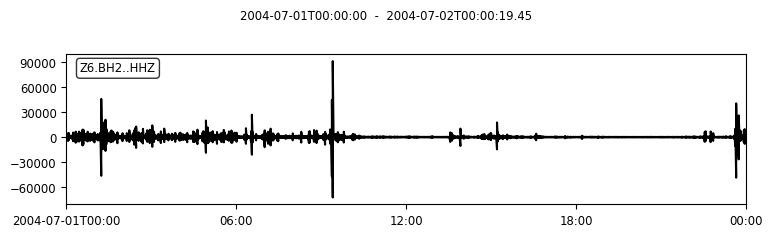

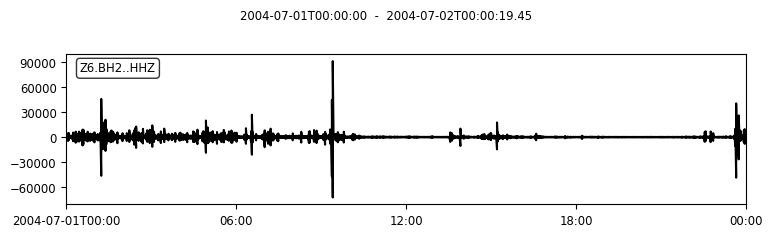

In [4]:
import obspy

# hari 1
st = obspy.read("meramex_bh12/continuous1/raw/Z6.BH2..HHZ")
st.plot()

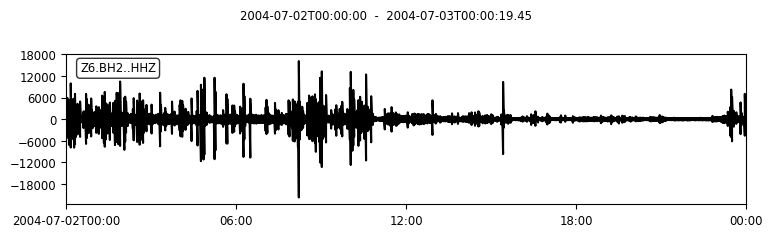

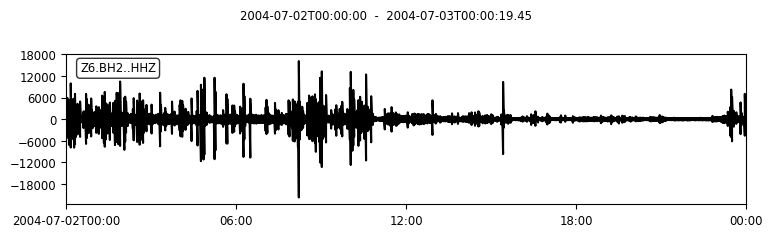

In [5]:
# hari 2
st2 = obspy.read("meramex_bh12/continuous2/raw/Z6.BH2..HHZ")
st2.plot()

## 9. Menampilkan Pada Google Earth atau VTK

Kita dapat mengekspor peta-peta ke dalam format Keyhole Markup Language (KML) untuk ditampilkan di Google Map dengan menambah *flag* `--create_kml`:

```
obspyDMT --datapath event_2021 --local --plot_ev --plot_sta --plot_focal --plot_ray --create_kml
```

Contoh (Hosseini dan Sigloch, 2017):

![google map kml](https://github.com/kasra-hosseini/obspyDMT/raw/master/figures/KML_event_based_example.png)

Untuk format VTK untuk dibuka di VTK:

```
obspyDMT --datapath event_2021 --local --create_event_vtk
```

Contoh (Hosseini dan Sigloch, 2017):

![vtk](https://github.com/kasra-hosseini/obspyDMT/raw/master/figures/events_neic_vtk.png)

## 10. Menjalankan ObspyDMT Melalui Lingkungan Python

ObspyDMT sepertinya didesain agar lebih mudah dijalankan melalui CLI tetapi apabila ada pengguna yang ini menggunakan dalam lingkungan Python ini adalah salah satu contohnya:

In [6]:
import obspyDMT.utils.event_handler as event
from obspyDMT.utils.local_handler import plot_sta_ev_ray, plot_seismicity

/Users/anangsahroni/Job/geohazardpy/obspyDMT/envodmt/lib/python3.7/site-packages/obspy/clients/arclink/__init__.py:178: ObsPyDeprecationWarning: The ArcLink protocol will be deprecated in the near future. Please, use the client contacting the routing service provided by EIDA: https://docs.obspy.org/packages/obspy.clients.fdsn.html#basic-routing-clients-usage
  warnings.warn(msg, category=ObsPyDeprecationWarning)


In [7]:
dics_neic = dict(datapath="./neic_event_meta_data",
            evlatmin=-11,
            evlatmax=6,
            evlonmin=110,
            evlonmax=141,
            min_depth=10,
            max_depth=500,
            max_mag=10,
            mag_type="Mw",
            evlat=None,
            evlon=None,
            evradmin=None,
            evradmax=None,
            read_catalog=None,
            min_mag=5.5,
            min_date="2021-01-01",
            max_date="2021-02-25",
            event_catalog="NEIC_USGS",
            preset=0,
            offset=1800,)
 
data_neic = event.event_info(input_dics=dics_neic)


Event(s) are based on:	NEIC_USGS
#Divisions: 1
1,
Assembling 2 xml files...
1,2,
cleaning up the temporary folder.

8.304047502999765 sec to retrieve the event info form NEIC.


/Users/anangsahroni/Job/geohazardpy/obspyDMT/envodmt/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/Users/anangsahroni/Job/geohazardpy/obspyDMT/envodmt/lib/python3.7/site-packages/obspy/core/util/attribdict.py:97: UserWarning: Setting attribute "preferred_mag_type" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/Users/an

In [8]:
events_neic = data_neic[0]
events_neic

[OrderedDict([('number', 1),
              ('latitude', 1.3663),
              ('longitude', 121.9224),
              ('depth', 16.4),
              ('datetime', 2021-02-22T19:22:10.297000Z),
              ('magnitude', 5.8),
              ('magnitude_type', 'mww'),
              ('author', 'None'),
              ('event_id', '20210222_192210.a'),
              ('origin_id',
               quakeml:earthquake.usgs.gov/archive/product/origin/us6000dk70/us/1614032954040/product.xml),
              ('focal_mechanism',
               [3.4959e+17,
                -5.3073e+17,
                1.8114e+17,
                -3.3889e+17,
                3.095e+16,
                -1.3897e+17]),
              ('source_duration', False),
              ('flynn_region', 'NAN'),
              ('t1', 2021-02-22T19:22:10.297000Z),
              ('t2', 2021-02-22T19:52:10.297000Z)]),
 OrderedDict([('number', 2),
              ('latitude', 5.688),
              ('longitude', 127.1064),
              ('dept

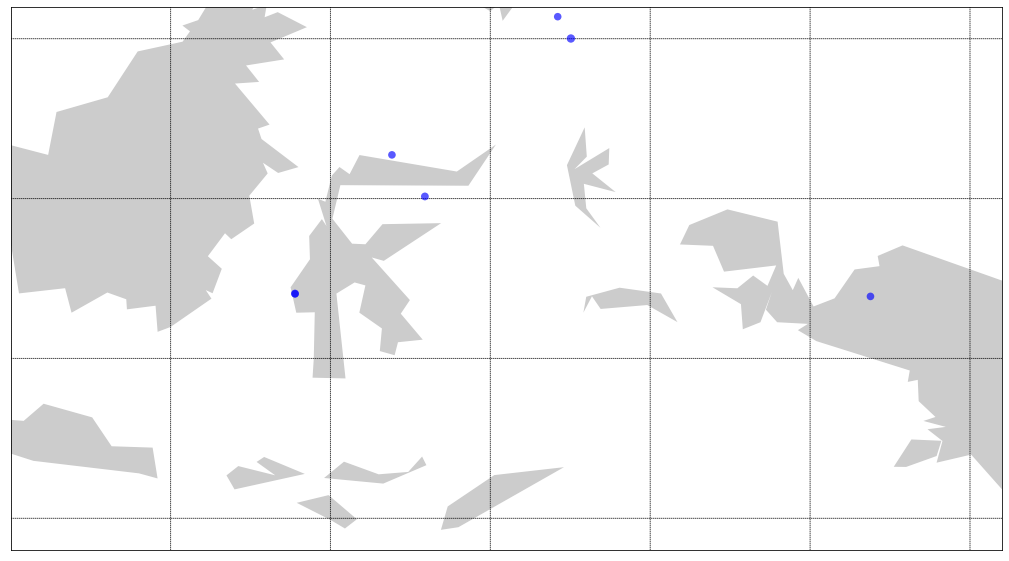

In [9]:
dics_neic['plot_sta'] = None
dics_neic['plot_availability'] = None
dics_neic['plot_ev'] = True
dics_neic['plot_ray'] = None
dics_neic['plot_style'] = "shaded_relief"
dics_neic['plot_focal'] = None
dics_neic['plot_save'] = None
dics_neic['show_no_plot'] = False
plot_sta_ev_ray(dics_neic,events_neic)


Seismicity map



/Users/anangsahroni/Job/geohazardpy/obspyDMT/envodmt/lib/python3.7/site-packages/obspy/imaging/beachball.py:191: UserWarning: There is a known bug when plotting semi-transparent patches for non-DC sources, which leads to blending of pressure and tension color, see issue #1464.
  warnings.warn(msg)


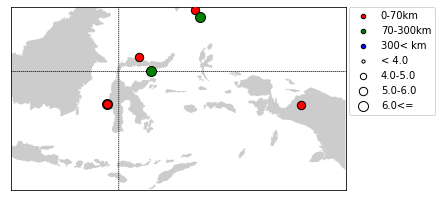

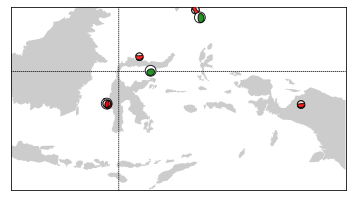

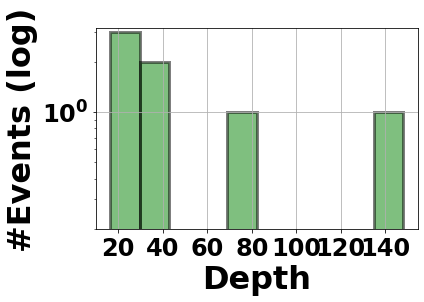

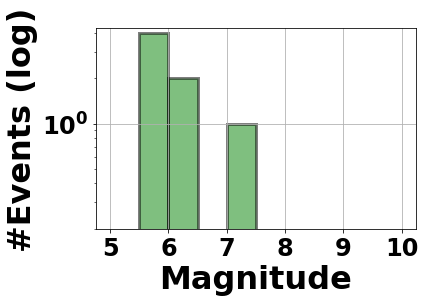

In [11]:
from obspyDMT.utils.local_handler import plot_sta_ev_ray, plot_seismicity
dics_neic['plot_lon0'] = 105
dics_neic['depth_bins_seismicity'] = 10
dics_neic['plot_focal'] = True
dics_neic['plot_ev'] = False
dics_neic['plot_style'] = "shaded_relief"
dics_neic['plot_save'] = "./seismicity.png"
plot_seismicity(dics_neic,events_neic)

## Penutup

Masih banyak fitur dan parameter yang dapat digunakan dan dieksplorasi lebih lanjut dengan ObspyDMT ini seperti cara loading data yang sudah ada, daftar-daftar penyedia data, dan lain sebagainya. Informasi lebih mendetail dapat dibaca melalui publikasi yang dapat diakses disini: [Download Paper ObspyDMT](http://www.earth.ox.ac.uk/~karins/pubs/HosseiniSigloch2017_obspyDMT_se-2017-46.pdf)